<div style="border:solid black 2px; padding: 20px">
<b>Hello!</b>

My name is Polina Berezhnaia, and I'm gonna review your project on Forecasts and Predictions.
    
I enjoyed checking your project a lot! It is nice you put a lot of effort into this work and did your best to complete everything in a perfect manner. However, there are several issues to consider and improve. 
    
In the notebook, you can find 4 types of my comments:
- <div class="alert alert-danger">
  <h3>Reviewer's comment</h3> It is necessary to make some corrections otherwise the project will not be accepted.
  </div>
    
    
- <div class="alert alert-warning">
  <h3>Reviewer's comment</h3> Such comment is some kind of recommendation on future improvements. It is up to you whether you wanna do any extra work or not.
  </div>
    
    
- <div class="alert alert-success">
  <h3>Reviewer's comment</h3> You will find such comments when everything is done in a perfect way.
  </div>
    
    
- <div style="border:solid black 2px; padding: 20px">
  <h3>Checklist</h3> Such comment can be found in the end of the notebook and depicts adjustments required.
  </div>

Let's work on this project in a form of the dialogue. If you **change or add something**, it would be great to **highlight a change** somehow. Also I would ask you **not to move, change or delete** my comments. All these will help to complete the next review much faster.
    
No worries if you didn't manage to complete some task on the first attempt. The main goal of our team is not to find mistakes, but to share our experience and help you to master your analytical skills 🙂
    
I'm looking forward to seeing your perfect project next time! I'm sure you're gonna be fine!

</div>

<div style="border:solid green 2px; padding: 20px">
<b>Hello there!</b>
    
You fixed all the issues and did a great job! I appreciate you put a lot of effort into this project and participated in the discussion! You are a very promising student, thank you for trying to do your best :)
    
I wish you good luck, and hope you will become a professional analyst very soon!
    

<h1>Project Forecasts and Predictions </h1> 

<h2>Goal of the project:</h2>
<h3>Main purpose of this project is to analyze Gym customers data in order to find out main reason for churn.

In addition, I need to divide all customers to groups and predict which one is more vulnerable and what can be improved in order to lower churn
.</h3>

<h2>Contents</h2>

[<font size="+1">Step 1. Downloading the data</font>](#Step_1)

[<font size="+1">Step 2. Exploratory data analysis</font>](#Step_2)

[<font size="+1">Step 3. Building a model to predict user churn </font>](#Step_3)

[<font size="+1">Step 4. Create user clusters</font>](#Step_4)

[<font size="+1">Step 5. General conclusion</font>](#Step_5) 

<div class="alert alert-success">
<h3>Reviewer's comment</h3>
    
It is great we have the description of our task and details of empirical strategy, as well as the table of contents 👍🏻. All these help to navigate a new user through your project effectively.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 

<a id='Step_1'></a>

In [2]:
#import csv file

try:
    data = pd.read_csv('/datasets/gym_churn_us.csv')
except:
    print('Issue during uploading files')


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB
None


In [4]:
print(data.head())

   gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0  

In [5]:
# checking for null values

print(data.isnull().sum())

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64


In [6]:
# checking for null values for duplicated values

print(data.duplicated().sum())

0


<div class="alert alert-info"> <b>
Conclusion, reviewing the data.
    

I have received CSV file containing data on churn for a given month and information on the month preceding it.

Mentioned data contains all information information about customers that will be used in order to predict Churn.

I have one target value which his column Churn and 13 features.

During this step I imported all libraries that I will use further and verified that I have no duplicates or null values.


</div>

<div class="alert alert-success">
<h3>Reviewer's comment</h3>
    
Nice data quality analysis 👍🏻

<h2>Step 2. Exploratory data analysis</h2>

<a id='Step_2'></a>

<h3> studying mean values of features </h3> 

In [7]:
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


<div class="alert alert-info"> <b>
Conclusion, describe output.

I noticed that we have almost equal number of genders, partners/not partners and group visitors.

Most of customers located near to this Gym, avarege age is 28-30.

Also it seems we have about 20-30% of churn.

</div>

In [8]:
print(data.groupby('Churn').agg({'mean'}))

         gender Near_Location   Partner Promo_friends     Phone  \
           mean          mean      mean          mean      mean   
Churn                                                             
0      0.510037      0.873086  0.534195      0.353522  0.903709   
1      0.510839      0.768143  0.355325      0.183789  0.902922   

      Contract_period Group_visits        Age Avg_additional_charges_total  \
                 mean         mean       mean                         mean   
Churn                                                                        
0            5.747193     0.464103  29.976523                   158.445715   
1            1.728558     0.268615  26.989632                   115.082899   

      Month_to_end_contract  Lifetime Avg_class_frequency_total  \
                       mean      mean                      mean   
Churn                                                             
0                  5.283089  4.711807                  2.024876   
1    

<div class="alert alert-info"> <b>
Conclusion, mean values.
    
Now when I have groups of left customers and customers that still keep coming I can say following:
    
- Both genders can quit, there is no any difference.
- Customers that located far from Gym quit more.
- Customers with no partnership or group visitors quit more.
- Also it is clear that customers that spend more money will stay.

</div>

<h3>Plot bar histograms and feature distributions for those who left (churn) and those who stayed.</h3>

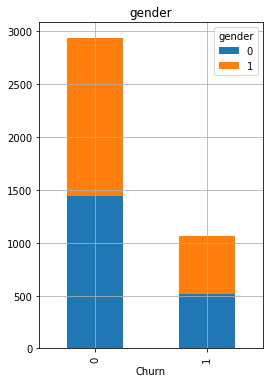

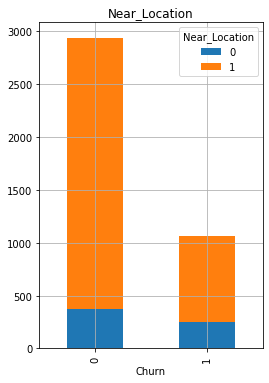

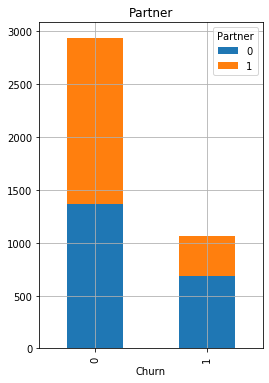

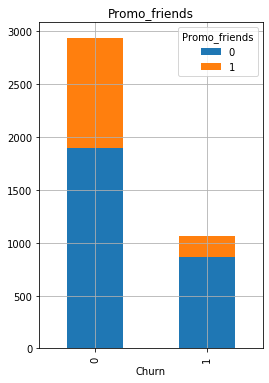

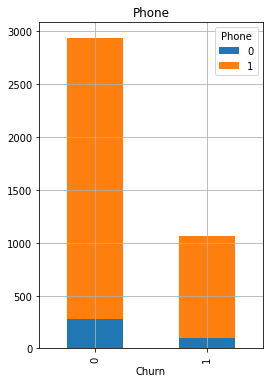

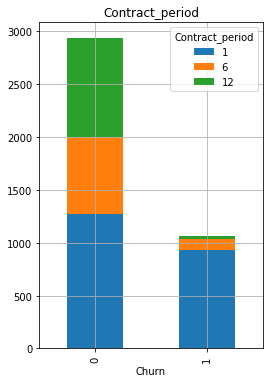

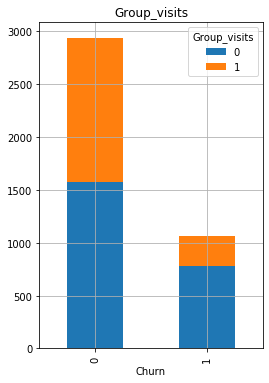

In [9]:
# Categorical variables

cat_val  = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Contract_period', 'Group_visits']

for i in cat_val:
    data.groupby(['Churn', i]).size().unstack().plot(kind='bar',stacked=True, figsize=(4, 6), grid=True)
    plt.title(i)

<div class="alert alert-info"> <b>
Conclusion, Barplot

Barplot indeed confirms previous conslusion:
    
- No differences in gender
- With partnership people rather stay.
- Who left do not particiapte in group sessions.
- They boght 1 month pass.
- They were not invited by friends. 

</div>

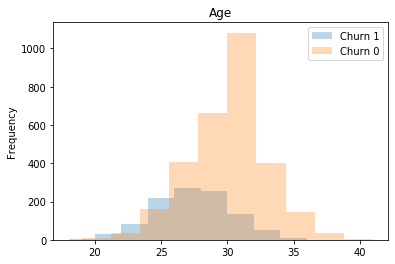

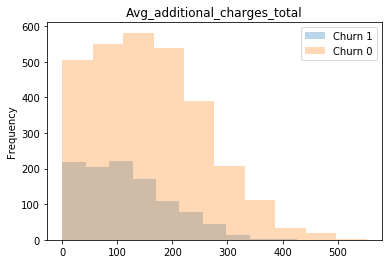

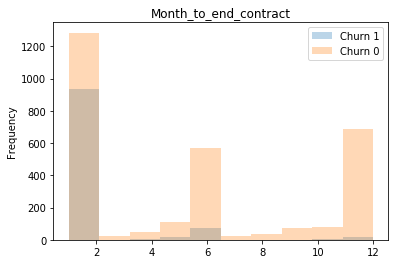

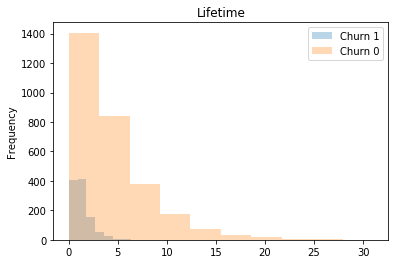

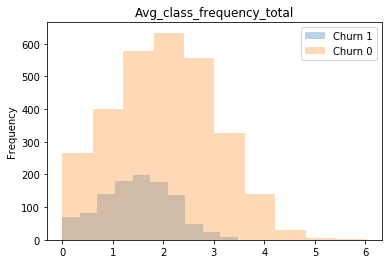

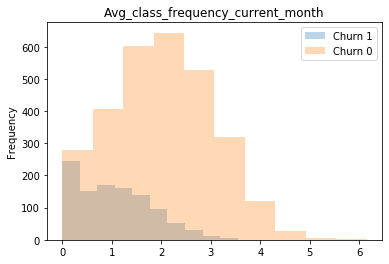

In [10]:
# numerical values

num_val = ['Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']

for i in num_val:
    data[data['Churn'] == 1][i].plot(kind='hist', alpha=0.3, label='Churn 1')
    data[data['Churn'] == 0][i].plot(kind='hist', alpha=0.3, label='Churn 0')
    plt.title(i)
    plt.legend()
    plt.show()
    

   

<div class="alert alert-info"> <b>
Conclusion, numerical values.
    
Based on histograms above I can conclude following:
    
- Average age of those who left is 25 and those who stay is 30.
- Who left spent less money on other gym services: cafe, athletic goods, cosmetics, massages, etc.
- Most of the people left after short period of time.
- Average frequency of visits per week for customers that left is smaller

</div>

<Figure size 2160x2160 with 0 Axes>

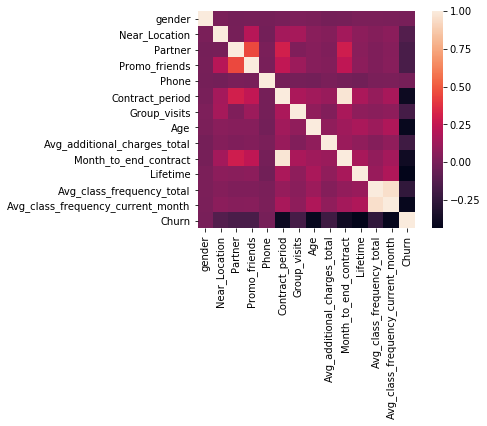

<Figure size 2160x2160 with 0 Axes>

In [11]:
corr_m = data.corr()

# plot a heatmap

sns.heatmap(corr_m, square = True)
plt.figure(figsize = (30,30))


<div class="alert alert-info"> <b>
Conclusion, heatmap.
    
Based on heatmap I can say that there is no obvious features that correlate with the target variable with an absolute value of more than 0.9

</div>

<div class="alert alert-success">
<h3>Reviewer's comment</h3>
    
You conducted a comprehensive and deep analysis. Agree with all your observations! Great job 🔥
    
You may have noticed that we have two pairs of highly correlated features. One variable from such pair should be removed to avoid its domination over other variables during training stage.

<h2> Step 3. Building a model to predict user churn </h2>

<div class="alert alert-warning">
<h3>Reviewer's comment</h3>

We can add stratify=y inside train_test_split function, where y is our target variable. As a result, the dataset will be devided into two clusters. The first one will contain all the observations of class 0, while the second one – all the observations of class 1. Then, 20% of observations from each cluster will be combined into test set:

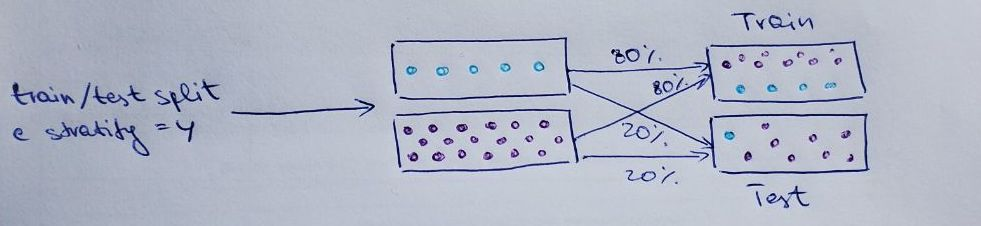
    
This approach helps to split the data into train and test sets in a way that preserves the proportions of observations in each class as observed in the original dataset. It is important as our classes are imbalanced.

<a id='Step_3'></a>

In [12]:
# Logistic Regression

X = data.drop('Churn', axis = 1)
y = data['Churn']

# divide the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)

# transform train and test sets
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# define the model's algorithm 
model = LogisticRegression()

# train your model
model.fit(X_train_st, y_train)

# use the trained model to make forecasts
predictions = model.predict(X_test_st) 
#probabilities = model.predict_proba(X_test)


######

# random forest

rf_model = RandomForestClassifier(n_estimators = 1000, random_state = 0)
rf_model.fit(X_train_st, y_train)

rf_predictions = rf_model.predict(X_test_st) 
rf_probabilities = rf_model.predict_proba(X_test_st)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<div class="alert alert-warning">
<h3>Reviewer's comment</h3>
    
To silence the warning, it is enough to specify solver inside LogisticRegression( ).

In [13]:
# accuracy, precision, and recall for both models
print('Logistic Regression:')
print('')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score (y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score (y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions) ))

print('')
print('Random forest:')
print('')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score (y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score (y_test, rf_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, rf_predictions) ))

Logistic Regression:

Accuracy: 0.92
Precision: 0.85
Recall: 0.83
F1: 0.84

Random forest:

Accuracy: 0.92
Precision: 0.84
Recall: 0.82
F1: 0.83


<div class="alert alert-info"> <b>
Conclusion, Building a model.

I used two models for predictions:
- Logistic regression
- Random forest

First of all I devided data (80 and 20%) for test and validation, also decided to normalize data.

Based on metrics (Accuracy, Precision, Recall and F1), I can say that there is no significant difference between Logistic regression and random forest.



</div>

<div class="alert alert-success">
<h3>Reviewer's comment</h3>
    
The step is completed absolutely correctly! Well done 👍🏻

<h2> Step 4. Create user clusters </h2>

<a id='Step_4'></a>

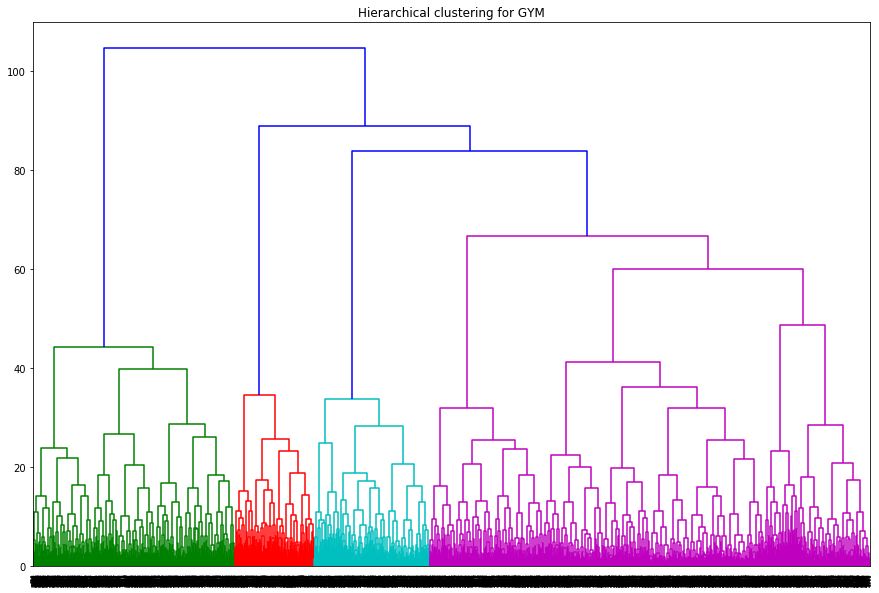

In [14]:
#  dendrogram / Agglomerative hierarchical clustering

sc = StandardScaler()
x_sc = sc.fit_transform(X)


linked = linkage(x_sc, method = 'ward') 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for GYM')
plt.show() 

<div class="alert alert-info"> <b>
Conclusion, Dendrogram.
    
Using Agglomerative hierarchical clustering and building dendrogram we can see that all customers devided to 4 groups.

</div>

<div class="alert alert-success">
<h3>Reviewer's comment</h3>

Agree :)

<div class="alert alert-danger">
<h3>Reviewer's comment</h3>
    
It is necessary to specify random_state for KMeans( ) function. Otherwise, the results will be different every time you re-run the code :)

<div class="alert alert-success">
<h3>Reviewer's comment v2</h3>
    
Good 👍🏻

In [15]:
# K-means with predefined 5 clusters 

km = KMeans(n_clusters = 5, random_state=0)
labels = km.fit_predict(x_sc)
data['cluster_km'] = labels

<h3> Mean value for clusters </h3>

In [16]:


print(data.groupby('cluster_km').mean())

              gender  Near_Location   Partner  Promo_friends     Phone  \
cluster_km                                                               
0           0.502473       0.959446  0.783383       0.574679  1.000000   
1           0.522078       0.862338  0.470130       0.306494  0.000000   
2           0.495050       0.000000  0.463366       0.079208  1.000000   
3           0.485737       1.000000  0.350238       0.240095  1.000000   
4           0.560335       0.976105  0.356033       0.229391  0.998805   

            Contract_period  Group_visits        Age  \
cluster_km                                             
0                 10.884273      0.543027  29.980218   
1                  4.787013      0.425974  29.301299   
2                  2.352475      0.215842  28.477228   
3                  1.948494      0.341521  28.167987   
4                  2.665472      0.473118  30.127838   

            Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
cluster_km 

<div class="alert alert-info"> <b>
Conclusion, K-means.
    
We are getting 5 clusters using k-means:

- Group that has lowest churn is 0 and we can see that for this group most of customers located near to gym, they have partnership, they were invited by friends, they particiapte in group sessions and avarege age is 30, also they have long contract.
- Group that has highest churn is 2, they came without partnership, were not invited by their friends, they are coming not so frequent, spend less money, have lowest avarege age and do not participate in group sessions.
</div>

<h3> Plotting distributions of features for the clusters. </h3>

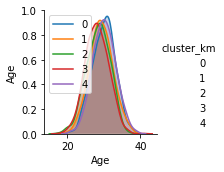

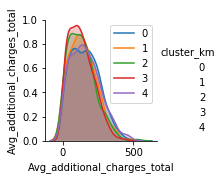

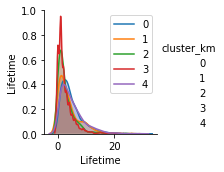

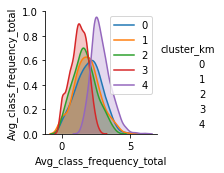

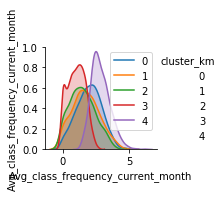

In [17]:
num_val = ['Age', 'Avg_additional_charges_total',  'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']


for i in num_val:
    sns.pairplot(data, vars=[i] , hue ='cluster_km')
    plt.legend()
    plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  del sys.path[0]
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


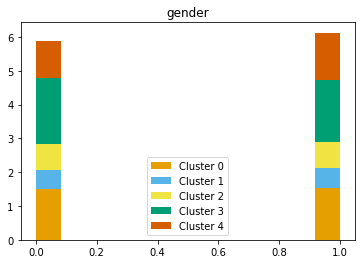

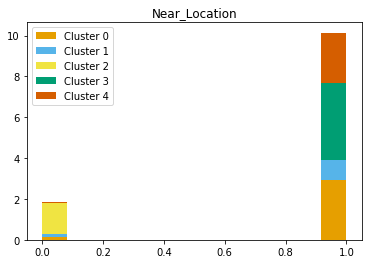

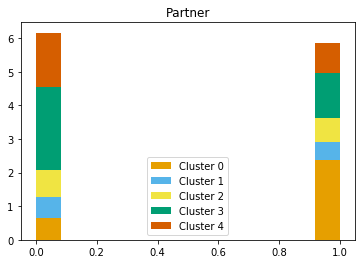

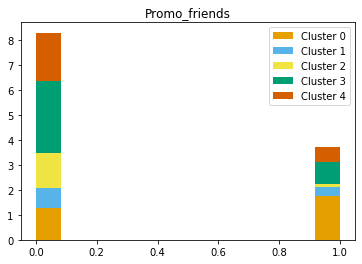

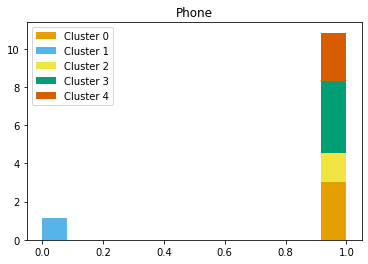

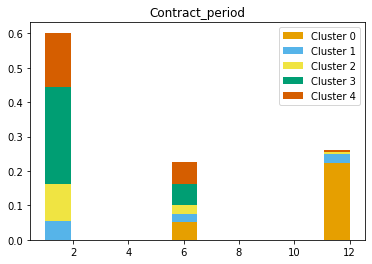

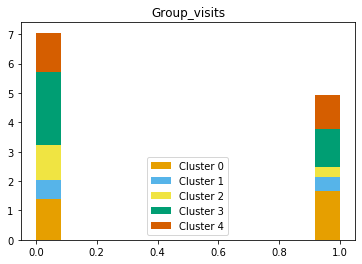

In [18]:
cat_val  = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Contract_period', 'Group_visits']


for i in cat_val:
    x1 = list(data[data['cluster_km'] == 0][i])
    x2 = list(data[data['cluster_km'] == 1][i])
    x3 = list(data[data['cluster_km'] == 2][i])
    x4 = list(data[data['cluster_km'] == 3][i])
    x5 = list(data[data['cluster_km'] == 4][i])
    colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
    names = ['Cluster 0', 'Cluster 1', 'Cluster 2','Cluster 3', 'Cluster 4']
    plt.hist([x1, x2, x3, x4, x5], bins = int(180/15), stacked=True,
         normed=True, color = colors, label=names)
    plt.title(i)
    plt.legend()
    plt.show()

<div class="alert alert-warning">
<h3>Reviewer's comment</h3>
    
It is also possible to use boxplots to avoid graphs overlapping.

<div class="alert alert-info"> <b>
Conclusion, distributions of features for the clusters.
    
As it was mentioned before, for cluster with highest number of churn avarege age is low, they quit after short perios of time and they do not visit Gym often
</div>

<div class="alert alert-danger">
<h3>Reviewer's comment</h3>
    
Could you please also plot and analyse the distributions of discrete variables :)

<div class="alert alert-info"> <b>
Conclusion, distributions of discrete variables for the clusters.

- Gender distributed equally for all groups.
- Most of custoemr that located far from gym are in group 2
- Group 0 has more customers that came through partnership, group 3 has more customers with no partnership.
- In general we have less customers that were invited by friends 
- Most of custoemr provided phone number.
- Most of the user prefer to buy 2 month contract. Cluster 3 has more such customers.    
    
</div>

<div class="alert alert-success">
<h3>Reviewer's comment</h3>
    
Well done 👍🏻

<h3> Churn rate for each cluster </h3>

In [19]:
ratio_clusters = data.groupby('cluster_km', as_index=False)['Churn'].agg(['count', 'sum'])
ratio_clusters['ratio'] = ratio_clusters.apply(lambda x: x['sum'] / x['count'], axis=1)

print(ratio_clusters.sort_values(by='ratio', ascending=False))

            count  sum     ratio
cluster_km                      
3            1262  649  0.514263
2             505  224  0.443564
1             385  103  0.267532
4             837   57  0.068100
0            1011   28  0.027695


<div class="alert alert-info"> <b>
Conclusion, Churn rate for each cluster.
    
Biggest cluster is 3 and it has highest rate of churn, almost 50%, also we have cluster 0 that has only 2% of churn!
</div>

<h2> Step 5. General Conclusion </h2>



<a id='Step_5'></a>

<div class="alert alert-info"> <b>
General Conclusion.
    
During this project I worked with data of Gym customers. Recieved dataframe included target value (Churn) and 13 features.

The goal was to analyze this data and find correlation with churn and provide recommendations regarding the strategy for customer interaction and retention. 

1. First step of analyze was building graphs and reviewing mean values of features for two groups (Churn)

It was clear that some features do not correlate much with churn (gender, location, age) and some of them do (spent money, participating in group sessions, frequency of visits).
So we already can say who probably will quit.

2. Second part of project was to train model that will predict in the future whether customer is going to stay or quit.

Accuracy of model is 0.92 which is a good result and such model can be used.

In addition all customers were divided to 5 different groups. Out of this groups I identefied one with lowest churn and one with highest.

3. Recommendations:

 - As we see that average age of people that quit is 25 (probably students) I would recommend to launch some discount program for such category customers.
 - Also it makes sense to attract more customer by "bring a friend" feature.
 - Work with local companies and build more partnership.
 - Perform remote classes (for young ages)

</div>

<div class="alert alert-success">
<h3>Reviewer's comment</h3>
    
The conclusion is well-structured and informative. I appreciate that you suggested some intersting ideas 🙂

<div style="border:solid black 2px; padding: 20px">
<h3>Checklist</h3> 
    
Let's make your project truly awesome and work a little bit more on the following issues:

1. **Fix random_state issue and analyse the changes.**
2. **Plot missing distributions.**

Looking forward to seeing your perfect project next time! Feel free to ask whatever questions you have. Good luck 🙂
</div>

<div class="alert alert-info"> <b>
Hello Polina,

Thank you for your review and kind words (did not expect that) , in addition thank you for suggested stratify parametr.

I fixed mentioned issues, please check.

Thanks,
Andrey.

</div>